In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
data = pd.read_csv("SalesData.csv")

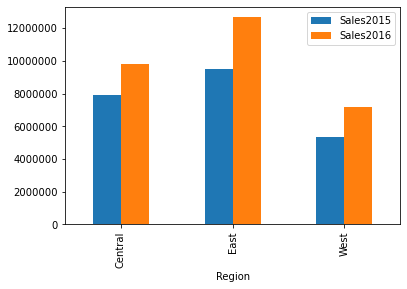

In [3]:
#1
df = data.groupby("Region").agg({"Sales2015":"sum","Sales2016":"sum"})
df.plot(kind="bar")
plt.ticklabel_format(axis="y",style="plain")

array([<AxesSubplot:ylabel='Sales2016'>], dtype=object)

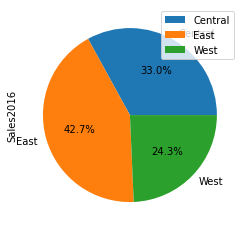

In [4]:
#2
df = data.groupby("Region").agg({"Sales2016":"sum"})
df.plot(kind="pie",subplots=True,autopct='%1.1f%%')

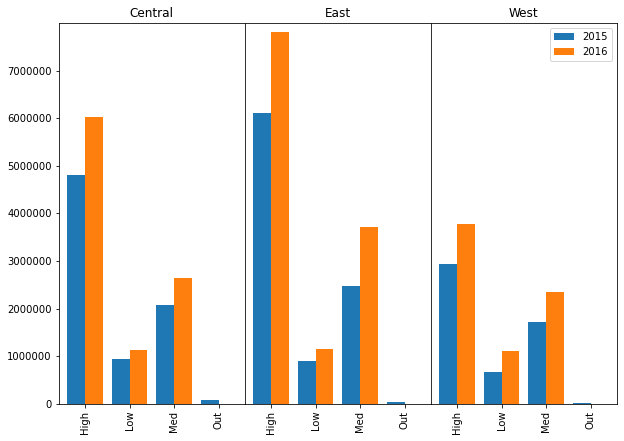

In [5]:
#3
df=data.pivot_table(index=["Region","Tier"],values=["Sales2015","Sales2016"],aggfunc="sum").reset_index()

fig , axs = plt.subplots(1,3,figsize=(10,7))
X_axis = np.arange(len(df.Tier.unique()))
for i in range(3):
    fd = df[df.Region == df.Region.unique()[i]]
    axs[i].bar(X_axis-0.2,fd.Sales2015,0.4,label=fd.Tier)
    axs[i].bar(X_axis+0.2,fd.Sales2016,0.4,label=fd.Tier)
    axs[i].set_title(df.Region.unique()[i])
    axs[i].set_xticks(X_axis)
    axs[i].set_xticklabels(fd.Tier.unique(),rotation=90)
    axs[i].set_ylim(0,8000000)
    axs[i].set_yticks(range(0,8000000,1000000))
    axs[i].set_yticklabels(range(0,8000000,1000000))
    if i > 0:
        axs[i].get_yaxis().set_visible(False)
plt.subplots_adjust(wspace=0)
plt.legend([2015,2016])
plt.show()

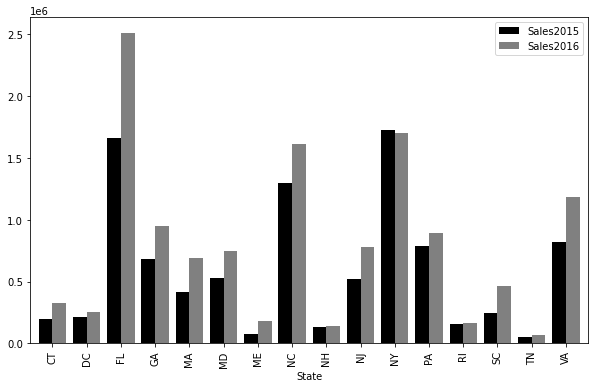

In [32]:
#4
df = data[data.Region == "East"].groupby("State").agg({"Sales2015":"sum","Sales2016":"sum"})
df.plot(kind="bar",figsize=(10,6),color=["Black","Gray"],width=0.8)
plt.show()

In [50]:
f"we can clearly see that there is decline in sales in {df[df.index.isin(np.where(df.Sales2015>df.Sales2016,df.index,0))].index[0]}from 2015 to 2016"

'we can clearly see that there is decline in sales in NYfrom 2015 to 2016'

<AxesSubplot:xlabel='Division'>

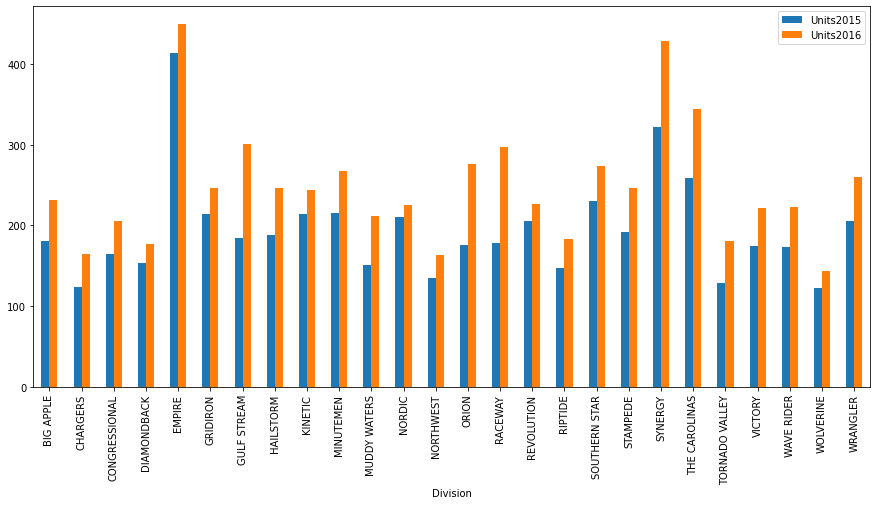

In [51]:
#5
df = data[data.Tier == "High"].groupby("Division").agg({'Units2015':'sum','Units2016':'sum'})
df.plot(kind="bar",figsize=(15,7))

In [52]:
f"There are {np.where(df.Units2015>df.Units2016,1,0).sum()} Divisions in the High Tier where the Units sold are greater in 2015 than in 2016"

'There are 0 Divisions in the High Tier where the Units sold are greater in 2015 than in 2016'

In [55]:
#6
Q1=["Jan","Feb", "Mar"]
Q2 =["Apr","May","Jun"]
Q3=["Jul","Aug","Sep"]
Q4=["Oct","Nov","Dec"]
data["Qtr"]=np.where(data.Month.isin(Q1),"Q1",np.where(data.Month.isin(Q2),"Q2",np.where(data.Month.isin(Q3),"Q3","Q4")))

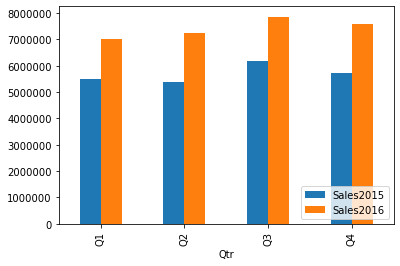

In [75]:
#7
data.pivot_table(index="Qtr",values=["Sales2015","Sales2016"],aggfunc="sum").plot(kind="bar")
plt.legend(loc="lower right")
plt.ticklabel_format(axis="y",style='plain')
plt.show()

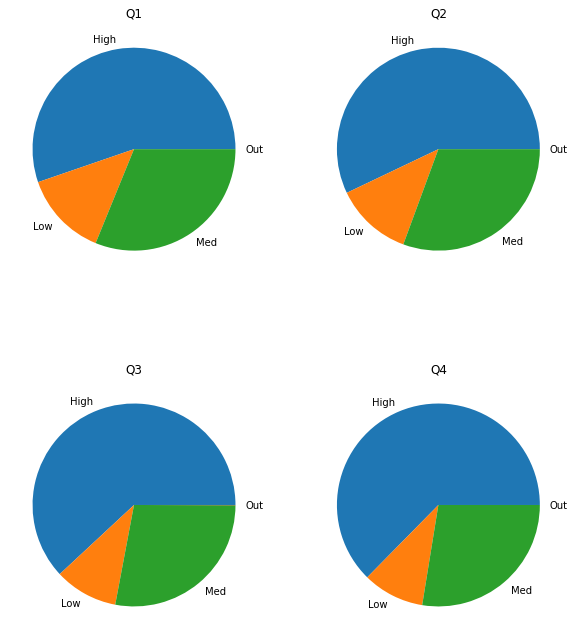

In [122]:
#8
plt.figure(figsize=(10,12))
df = data.pivot_table(index="Tier",columns="Qtr",values="Sales2016",aggfunc="sum").abs()
for i in range(len(df.columns)):
    fd = df.iloc[:,i]
    ax = plt.subplot(2,2,i+1)
    ax.pie(fd,labels=fd.index)
    plt.title(f"Q{i+1}")

'High'